In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
data =pd.read_csv('bank/bank.csv',sep=';')

   ## About Data
   
   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 
   
   #####   **The classification goal is to predict if the client will subscribe a term deposit (variable y).**

In [3]:
# About Data
print('Total Data points: ',len(data))
print('\nBlank or Null Values\n',data.isnull().sum(),sep='')

Total Data points:  4521

Blank or Null Values
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
col_cat = ['job','marital','education','default','housing','loan','contact','month','poutcome']
col_num = ['age','balance','day','duration','campaign','pdays','previous']

   ## Data Description
   
   ### Bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
  
  ### Related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
  ### Other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


  ### Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
col_num
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
round(data.describe(),2)

,age,balance,day,duration,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


In [9]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [10]:
# Categorical Features
data_gp = data.groupby('y')
print('** Values are in percentage\n',)
for a in data.columns[:-1]:
    if data[a].dtypes == 'object':
        print(round((data[a].value_counts(sort=True))*100/len(data),2),end='\n\n',sep='')
        print(round(data_gp[a].value_counts(sort=False,normalize=True)*100,2))        
        print('\n\n\n---------------------------------')
        
        

** Values are in percentage

management       21.43
blue-collar      20.92
technician       16.99
admin.           10.57
services          9.22
retired           5.09
self-employed     4.05
entrepreneur      3.72
unemployed        2.83
housemaid         2.48
student           1.86
unknown           0.84
Name: job, dtype: float64

y    job          
no   admin.           10.50
     blue-collar      21.92
     entrepreneur      3.82
     housemaid         2.45
     management       20.95
     retired           4.40
     self-employed     4.08
     services          9.48
     student           1.62
     technician       17.12
     unemployed        2.88
     unknown           0.78
yes  admin.           11.13
     blue-collar      13.24
     entrepreneur      2.88
     housemaid         2.69
     management       25.14
     retired          10.36
     self-employed     3.84
     services          7.29
     student           3.65
     technician       15.93
     unemployed        2.50
     

In [11]:
# Categorical Features
data_gp = data.groupby('y')
print('** Values are in Number\n',)
for a in data.columns[:-1]:
    if data[a].dtypes == 'object':
        print(round((data[a].value_counts(sort=True)),2),end='\n\n',sep='')
        print(round(data_gp[a].value_counts(sort=False)*100,2))        
        print('\n\n\n---------------------------------')

** Values are in Number

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

y    job          
no   admin.           42000
     blue-collar      87700
     entrepreneur     15300
     housemaid         9800
     management       83800
     retired          17600
     self-employed    16300
     services         37900
     student           6500
     technician       68500
     unemployed       11500
     unknown           3100
yes  admin.            5800
     blue-collar       6900
     entrepreneur      1500
     housemaid         1400
     management       13100
     retired           5400
     self-employed     2000
     services          3800
     student           1900
     technician        8300
     unemployed        1300
     unknown            700
Name: j

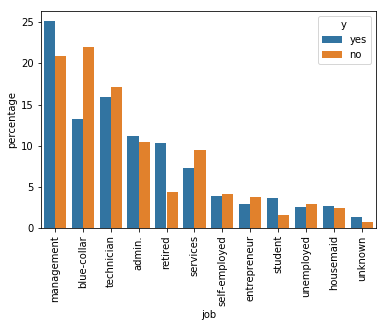

In [12]:
# % of categories in target (yes/no)

job_count = (data.groupby(['y'])['job'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('percentage',ascending=False))
p = sns.barplot(x="job", y="percentage", hue="y", data=job_count)
job_plot = plt.setp(p.get_xticklabels(), rotation=90)

#g=sns.countplot(x=data['job'],hue=data['y'])
#job = g.set_xticklabels(g.get_xticklabels(),rotation=90)

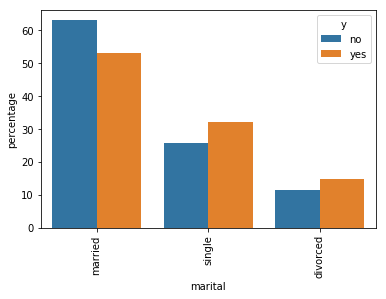

In [13]:
# % of categories in target (yes/no)

marital_count = (data.groupby(['y'])['marital'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('percentage',ascending=False))
p = sns.barplot(x="marital", y="percentage", hue="y", data=marital_count)
marital_plot = plt.setp(p.get_xticklabels(), rotation=90)

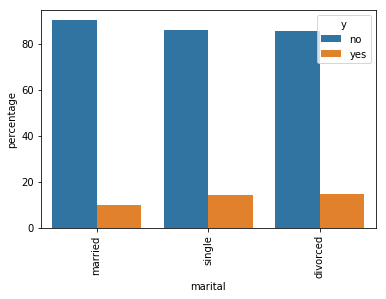

In [14]:
marital_count = (data.groupby(['marital'])['y'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('percentage',ascending=False))
p = sns.barplot(x="marital", y="percentage", hue="y", data=marital_count)
marital_plot = plt.setp(p.get_xticklabels(), rotation=90)

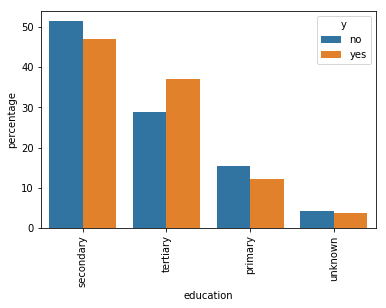

In [15]:
# % of categories in target (yes/no)

education_count = (data.groupby(['y'])['education'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('percentage',ascending=False))
p = sns.barplot(x="education", y="percentage", hue="y", data=education_count)
education_plot = plt.setp(p.get_xticklabels(), rotation=90)

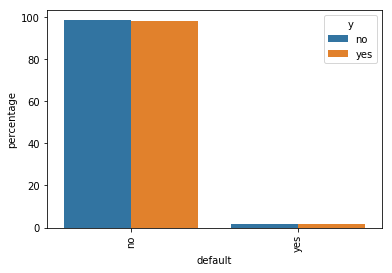

In [16]:
# % of categories in target (yes/no)

default_count = (data.groupby(['y'])['default'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('percentage',ascending=False))
p = sns.barplot(x="default", y="percentage", hue="y", data=default_count)
default_plot = plt.setp(p.get_xticklabels(), rotation=90)

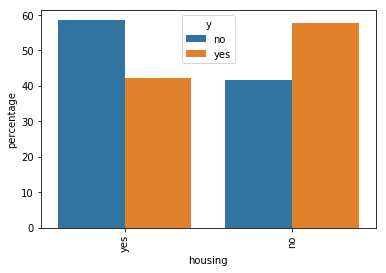

In [17]:
# % of categories in target (yes/no)

housing_count = (data.groupby(['y'])['housing'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('percentage',ascending=False))
p = sns.barplot(x="housing", y="percentage", hue="y", data=housing_count)
housing_plot = plt.setp(p.get_xticklabels(), rotation=90)

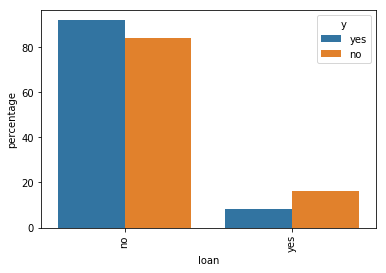

In [18]:
# % of categories in target (yes/no)

loan_count = (data.groupby(['y'])['loan'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('percentage',ascending=False))
p = sns.barplot(x="loan", y="percentage", hue="y", data=loan_count)
loan_plot = plt.setp(p.get_xticklabels(), rotation=90)

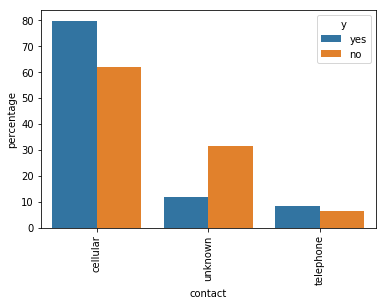

In [19]:
# % of categories in target (yes/no)

contact_count = (data.groupby(['y'])['contact'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('percentage',ascending=False))
p = sns.barplot(x="contact", y="percentage", hue="y", data=contact_count)
contact_plot = plt.setp(p.get_xticklabels(), rotation=90)

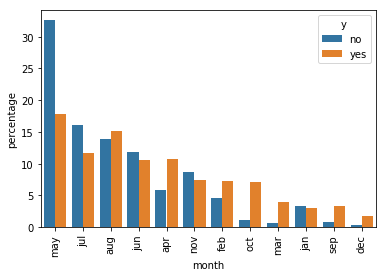

In [20]:
# % of categories in target (yes/no)

month_count = (data.groupby(['y'])['month'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('percentage',ascending=False))
p = sns.barplot(x="month", y="percentage", hue="y", data=month_count)
month_plot = plt.setp(p.get_xticklabels(), rotation=90)

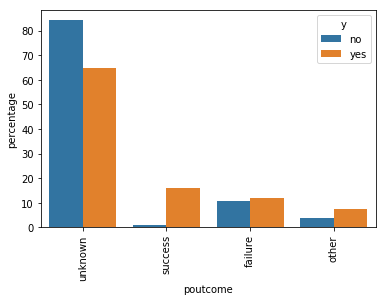

In [21]:
# % of categories in target (yes/no)

poutcome_count = (data.groupby(['y'])['poutcome'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('percentage',ascending=False))
p = sns.barplot(x="poutcome", y="percentage", hue="y", data=poutcome_count)
poutcome_plot = plt.setp(p.get_xticklabels(), rotation=90)

In [22]:
print(data[col_cat].head())
data_categorical = pd.get_dummies(data[col_cat])
data_categorical.head()

           job  marital  education default housing loan   contact month  \
0   unemployed  married    primary      no      no   no  cellular   oct   
1     services  married  secondary      no     yes  yes  cellular   may   
2   management   single   tertiary      no     yes   no  cellular   apr   
3   management  married   tertiary      no     yes  yes   unknown   jun   
4  blue-collar  married  secondary      no     yes   no   unknown   may   

  poutcome  
0  unknown  
1  failure  
2  failure  
3  unknown  
4  unknown  


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [23]:
data_numerical = data[col_num]
data_numerical.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


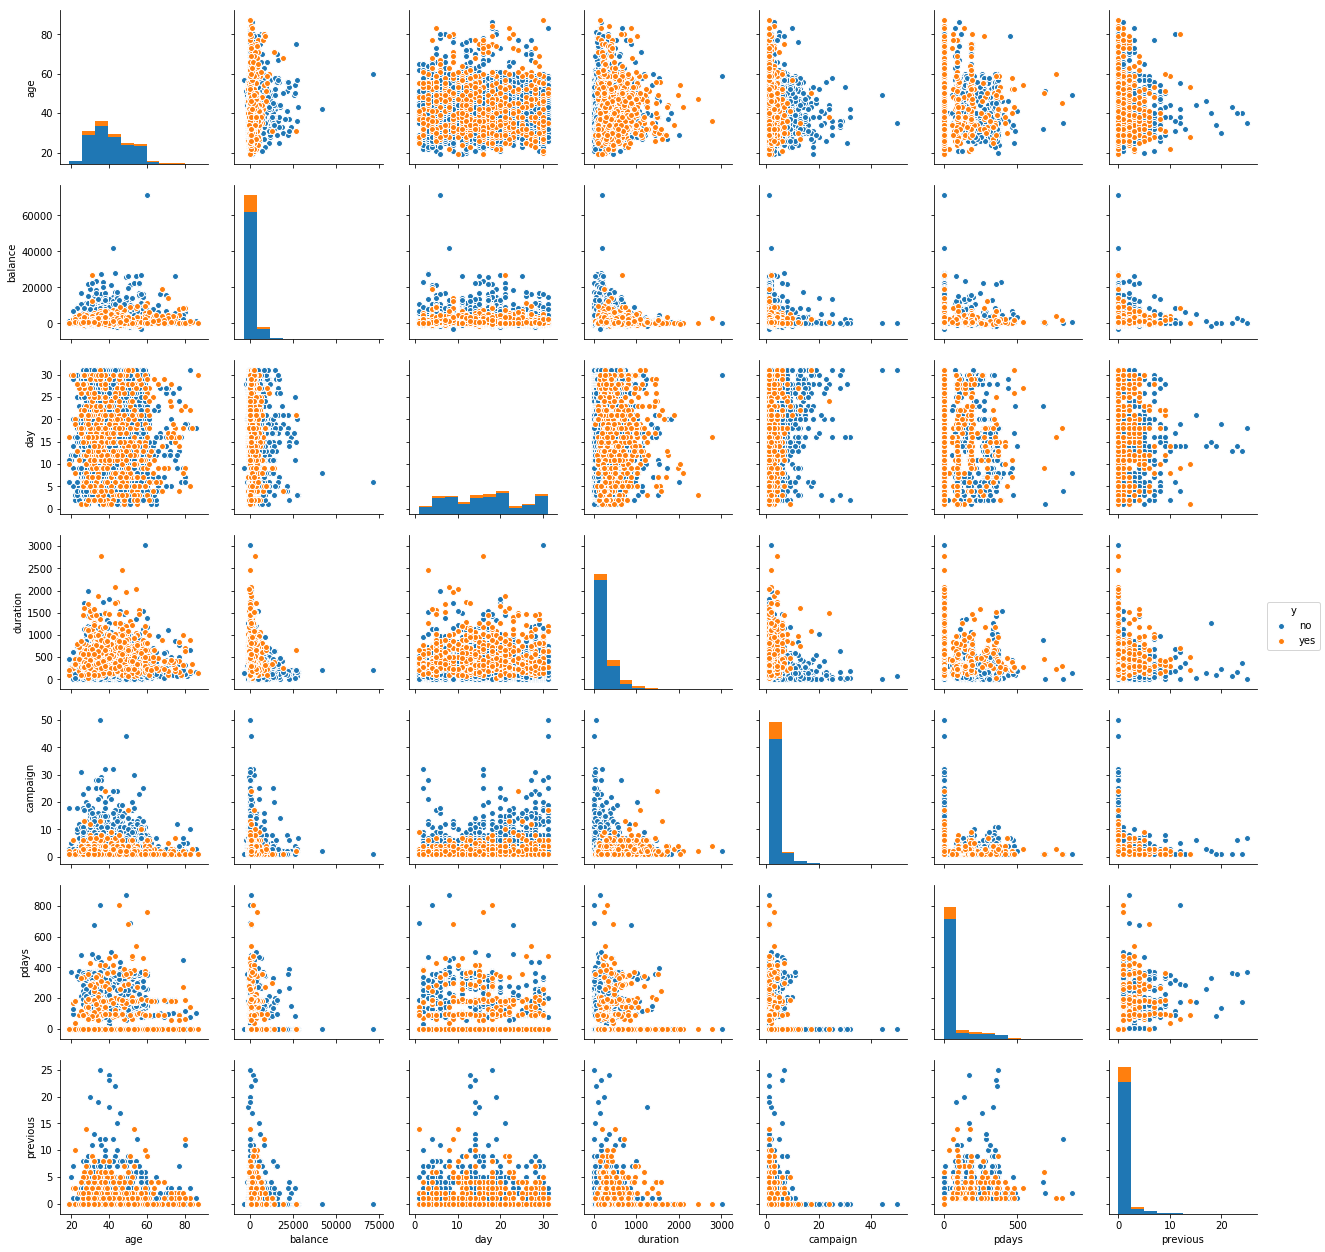

In [24]:
sns.pairplot(data,hue ='y')
# Not dropping outliers outside of 1.5* percentile range as values make sense for the variables.


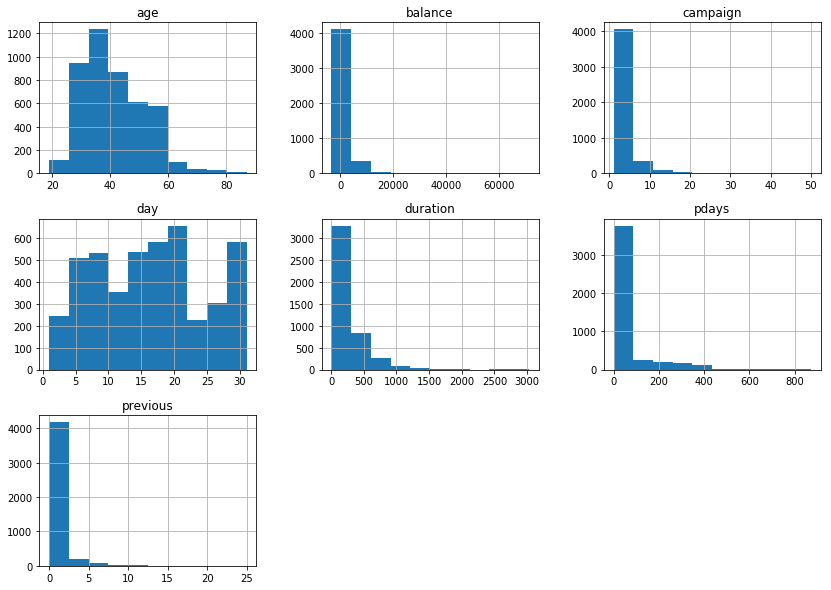

In [25]:
data_numerical.hist(bins=10, figsize=(14,10))
plt.show()


               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000


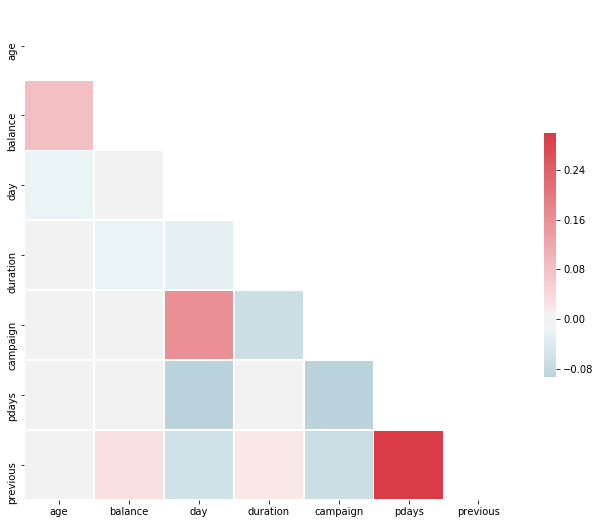

In [26]:
## Correlation plot

# Compute the correlation matrix
corr = data_numerical.corr()
print(corr)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


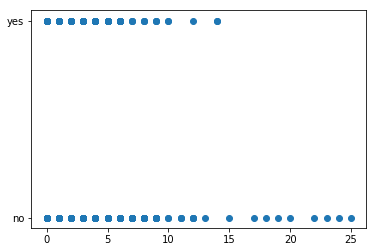

In [27]:
plot_age = plt.scatter(x='previous',y='y',data=data)

In [28]:
# plt_age = plt.boxplot(data_numerical['age'], 1, 'gD')

In [29]:
# plt_balance = plt.boxplot(data_numerical['age'], True, 'gD')

In [30]:
# plt_balance = plt.boxplot(data_numerical['balance'], 1, 'gD')

In [31]:
# plt_duration = plt.boxplot(data_numerical['duration'], 1, 'gD')

In [32]:
# plt_campaign = plt.boxplot(data_numerical['campaign'], 0, 'gD')

In [33]:
# plt_pdays = plt.boxplot(data_numerical['pdays'], 0, 'gD')

In [34]:
# plt_previous = plt.boxplot(data_numerical['previous'], 0, 'gD')

In [35]:
data_set = pd.concat([data_categorical,data_numerical],axis = 1)
data_set.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,30,1787,19,79,1,-1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,33,4789,11,220,1,339,4
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,35,1350,16,185,1,330,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,30,1476,3,199,4,-1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,59,0,5,226,1,-1,0


In [36]:
# from sklearn.ensemble import RandomForestClassifier
# from boruta import BorutaPy

# x= data_set.values
# y= data['y'].values.ravel()
# rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
# feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
# feat_selector.fit(x, y)
# feat_selector.support_
# feat_selector.ranking_
# x_filtered = feat_selector.transform(x)

In [37]:
logreg =LogisticRegression()
logreg2 =LogisticRegression(class_weight='balanced')

In [38]:
y = data['y'].copy()
y[y == 'no'] = 0
y[y == 'yes'] = 1
y=y.astype('float')

x_train, x_test, y_train, y_test = train_test_split(data_set, y, test_size=0.30, random_state=0)


In [39]:
logreg.fit(x_train,y_train)
logreg2.fit(x_train,y_train)
prediction = logreg.predict(x_test)
prediction2 = logreg2.predict(x_test)
printmd("**Logistic Regression 70:30 split\n**")
print(f'Intercept : {logreg.intercept_} \nCoefficients : \n{logreg.coef_}')



**Logistic Regression 70:30 split
**

Intercept : [-0.7186337] 
Coefficients : 
[[-2.07311072e-01 -5.04392463e-01 -3.61996385e-01 -3.66575427e-01
  -1.80454233e-01  6.85989134e-01 -5.33428143e-02 -1.62441609e-02
   4.12703476e-01 -1.40554019e-01 -3.68563981e-01  3.82108243e-01
  -1.78864597e-02 -4.17286555e-01 -2.83460688e-01 -1.79295387e-01
  -2.61602611e-01  1.65448101e-01 -4.43183806e-01 -5.54921643e-01
  -1.63712059e-01 -1.66749334e-01 -5.51884368e-01 -8.92082406e-03
  -7.09712879e-01  1.41887852e-01  8.66286113e-02 -9.47150166e-01
  -1.59629223e-03 -3.79812107e-01 -4.86333933e-02 -2.75808986e-03
  -8.94255537e-01 -7.05061593e-01 -2.83310093e-02  1.05262124e+00
  -6.56674190e-01 -6.15497235e-01  8.85459112e-01  6.75905390e-01
  -6.65964520e-01 -5.22647641e-01  1.30737371e+00 -8.37395257e-01
  -7.61720698e-04 -2.89234401e-05  6.86253911e-03  4.29793066e-03
  -1.00367408e-01  6.20225067e-04  2.94375315e-04]]


In [40]:
print('Model Evaluation using Kfold Validation')
kfold = model_selection.KFold(n_splits=10, random_state=30) # random state =seed
logistic_kfold = model_selection.cross_val_score(logreg, data_set,data['y'],cv = kfold, scoring='accuracy')
print(f"Accuracy: {round(logistic_kfold.mean(),4)*100}%  Standard Deviation : {round(logistic_kfold.std(),4)}")
#logistic_kfold
logistic_kfold1 = model_selection.cross_val_score(logreg, data_set,data['y'],cv = kfold, scoring='neg_log_loss')
print(f"LogLoss: {round(logistic_kfold1.mean(),4)}  Standard Deviation : {round(logistic_kfold1.std(),4)}")




Model Evaluation using Kfold Validation
Accuracy: 90.11%  Standard Deviation : 0.0189
LogLoss: -0.2498  Standard Deviation : 0.0325


 Classification Report
             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94      1190
        1.0       0.64      0.35      0.45       167

avg / total       0.88      0.90      0.88      1357

Confusion Metrics: 
 [[1157   33]
 [ 109   58]]


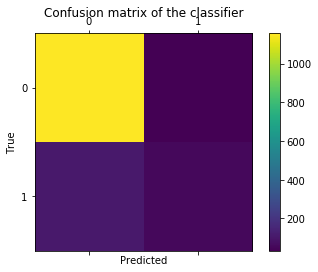

Test Accuracy of logistic model 89.54%


In [41]:
# ROC
# Sensitivity is the true positive rate also called the recall. 
# It is the number instances from the positive (first) class that actually predicted correctly.
# Specificity is also called the true negative rate. 
# Is the number of instances from the negative class (second) class that were actually predicted correctly.

from sklearn.metrics import classification_report
report = classification_report(y_test, prediction)
print(f' Classification Report\n{report}')


from sklearn import metrics
labels=[0,1]
cm = metrics.confusion_matrix(y_test, prediction, labels)
print(f'Confusion Metrics: \n {cm}')
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

score=logreg.score(x_test,y_test)*100
print(f'Test Accuracy of logistic model {round(score,2)}%')

# model drawback: log recall and moderate precision for category 1

Model Evaluation using Kfold Validation
Accuracy: 83.74000000000001%  Standard Deviation : 0.0176
LogLoss: -0.4359  Standard Deviation : 0.0266
 Classification Report
             precision    recall  f1-score   support

        0.0       0.97      0.86      0.91      1190
        1.0       0.44      0.78      0.56       167

avg / total       0.90      0.85      0.87      1357

Confusion Metrics: 
 [[1025  165]
 [  37  130]]


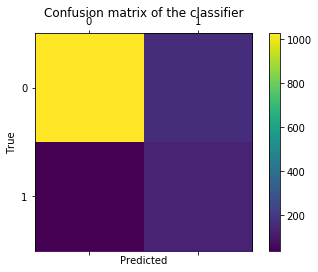

Test Accuracy of logistic model 85.11%


In [42]:
# For model with balanced cases for both the categories

print('Model Evaluation using Kfold Validation')
# kfold = model_selection.KFold(n_splits=10, random_state=30) # random state =seed
logistic_kfold = model_selection.cross_val_score(logreg2, data_set,data['y'],cv = kfold, scoring='accuracy')
print(f"Accuracy: {round(logistic_kfold.mean(),4)*100}%  Standard Deviation : {round(logistic_kfold.std(),4)}")
#logistic_kfold
logistic_kfold1 = model_selection.cross_val_score(logreg2, data_set,data['y'],cv = kfold, scoring='neg_log_loss')
print(f"LogLoss: {round(logistic_kfold1.mean(),4)}  Standard Deviation : {round(logistic_kfold1.std(),4)}")


# ROC
# Sensitivity is the true positive rate also called the recall. 
# It is the number instances from the positive (first) class that actually predicted correctly.
# Specificity is also called the true negative rate. 
# Is the number of instances from the negative class (second) class that were actually predicted correctly.

from sklearn.metrics import classification_report
report = classification_report(y_test, prediction2)
print(f' Classification Report\n{report}')


from sklearn import metrics
labels=[0,1]
cm = metrics.confusion_matrix(y_test, prediction2, labels)
print(f'Confusion Metrics: \n {cm}')
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

score=logreg2.score(x_test,y_test)*100
print(f'Test Accuracy of logistic model {round(score,2)}%')

# model drawback: log precision for category 1.
# Overall accuracy not that good

In [43]:
from sklearn.metrics import roc_curve
logreg.predict_proba(x_test)



array([[0.97748615, 0.02251385],
       [0.9860205 , 0.0139795 ],
       [0.62640986, 0.37359014],
       ...,
       [0.78045133, 0.21954867],
       [0.97587714, 0.02412286],
       [0.90960376, 0.09039624]])

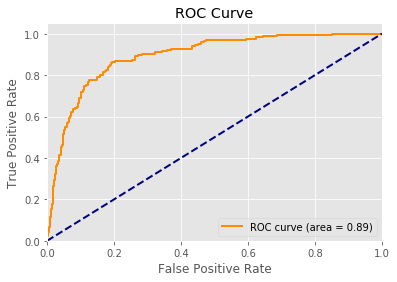

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = logreg.predict_proba(x_test)[:,1]


fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [45]:
# ## Decision Tree

# from sklearn.tree import DecisionTreeClassifier
# dtree = DecisionTreeClassifier(random_state = 30)

# #x_train, x_test, y_train, y_test = train_test_split(data[col_num].iloc[:,:-1], data['y'], test_size=0.30, random_state=0)
# dtree.fit(x_train,y_train )

In [46]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus

# dot_data = StringIO()

# export_graphviz(dtree, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [47]:
# #from sklearn.metrics import classification_report

# dtree_kfold = model_selection.cross_val_score(dtree, data_set,data['y'],cv = kfold, scoring='accuracy')
# print(f"Accuracy: {round(dtree_kfold.mean(),4)*100}%  Standard Deviation : {round(dtree_kfold.std(),4)}")

# # prediction on test

# prediction = dtree.predict(x_test)
# report = classification_report(y_test, prediction)
# print(f' \n{report}')

# labels=['no','yes']
# cm = metrics.confusion_matrix(y_test, prediction, labels)
# print(f'Confusion Metrics: \n {cm}')
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(cm)
# plt.title('Confusion matrix of the classifier')
# fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# score=dtree.score(x_test,y_test)*100
# print(f'Test Accuracy of decision tree model {round(score,2)}%')

